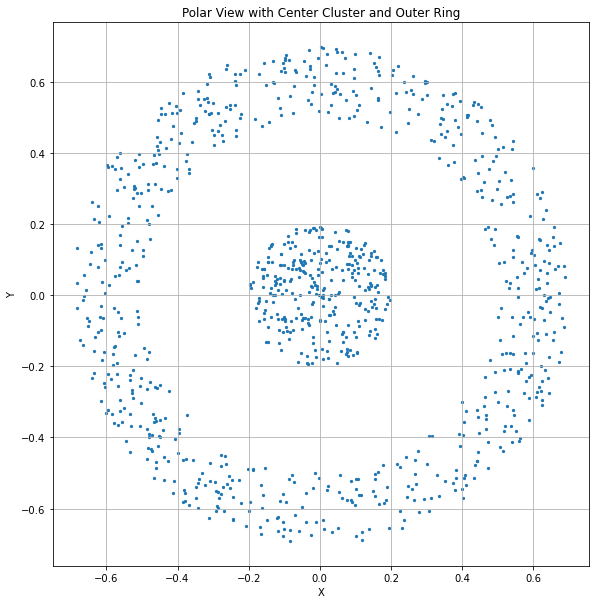

In [5]:
#generate polar points
import numpy as np
import matplotlib.pyplot as plt

def generate_polar_view_points(n_points=1000):
    # Center cluster parameters
    center_radius = 0.2
    # For 30% of the points in the center cluster
    theta_center = 2 * np.pi * np.random.rand(int(n_points * 0.3))
    r_center = center_radius * np.sqrt(np.random.rand(int(n_points * 0.3)))
    center_points = np.column_stack((r_center * np.cos(theta_center), r_center * np.sin(theta_center)))


    # Ring parameters
    inner_radius = 0.5
    outer_radius = 0.7
    # For 70% of the points in the ring
    theta_ring = 2 * np.pi * np.random.rand(int(n_points * 0.7))
    r_ring = np.sqrt(np.random.uniform(inner_radius**2, outer_radius**2, int(n_points * 0.7)))
    ring_points = np.column_stack((r_ring * np.cos(theta_ring), r_ring * np.sin(theta_ring)))


    # Combine points
    all_points = np.vstack((center_points, ring_points))
    
    return all_points

# Generate and plot the points
points = generate_polar_view_points()
plt.figure(figsize=(10, 10))
plt.scatter(points[:, 0], points[:, 1], s=5)
plt.title("Polar View with Center Cluster and Outer Ring")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


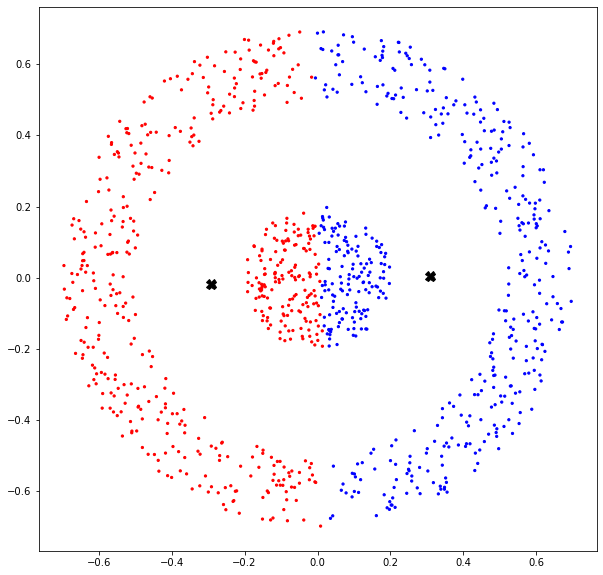

In [16]:
#k-means has a hard time with this polar structure
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML

# Generate the points as before
# ... [your generate_polar_view_points function here]

points = generate_polar_view_points()

# KMeans clustering with 2 clusters and random initialization
kmeans = KMeans(n_clusters=2, init='random', n_init=1, max_iter=1)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(points[:, 0], points[:, 1], s=5, color='black')  # Start with all points in black
centroids, = ax.plot([], [], 'kX', markersize=10)  # Cluster centers in black

def init():
    centroids.set_data([], [])
    return scatter, centroids

def update(frame):
    if frame > 0:
        kmeans.max_iter = frame
        kmeans.fit(points)
        labels = kmeans.labels_
        colors = ['blue' if label == 0 else 'red' for label in labels]  # Manually set colors based on labels
        scatter.set_color(colors)
        centroids.set_data(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
    return scatter, centroids

ani = FuncAnimation(fig, update, frames=16, init_func=init, blit=True, repeat=False, interval=500)  # Set interval to 500 ms


# Display the animation in Jupyter
display(HTML(ani.to_jshtml()))


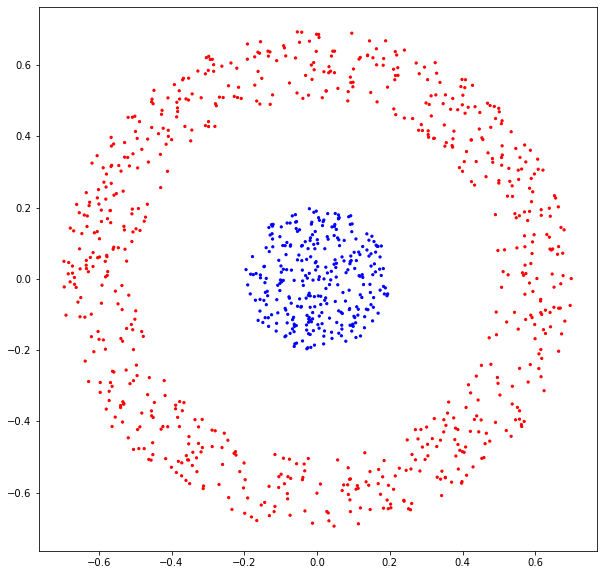

In [17]:
#DBSCAN to the rescue
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML

# Generate the points as before
# ... [your generate_polar_view_points function here]

points = generate_polar_view_points()

# DBSCAN clustering
dbscan = DBSCAN(eps=0.1, min_samples=5)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(points[:, 0], points[:, 1], s=5, color='black')  # Start with all points in black

def init():
    return scatter,

def update(frame):
    if frame == 1:
        labels = dbscan.fit_predict(points)
        colors = ['blue' if label == 0 else 'red' if label == 1 else 'black' for label in labels]
        scatter.set_color(colors)
    return scatter,

ani = FuncAnimation(fig, update, frames=2, init_func=init, blit=True, repeat=False, interval=1000)  # Set interval to 1000 ms

# Display the animation in Jupyter
display(HTML(ani.to_jshtml()))

